In [ ]:
import os
os.system('pip install -U pip setuptools wheel')
os.system('pip install -U spacy')
os.system('python -m spacy download en_core_web_sm')

0

In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import nltk
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
from nltk import FreqDist

In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
len(positive_tweets), len(negative_tweets)

(5000, 5000)

In [ ]:
positive_tweets[:50]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def get_tokens(tweets):
  generated_tokens = []
  for i in tweets:
    doc = nlp(i)
    for sent in doc.sents:
      tokens = []
      for token in sent:
        tokens.append(token)
      generated_tokens.append(tokens)
    
  return generated_tokens

In [ ]:
pos_tokens = get_tokens(positive_tweets)
neg_tokens = get_tokens(negative_tweets)

In [ ]:
pos_tokens[:50]

[[#,
  FollowFriday,
  @France_Inte,
  @PKuchly57,
  @Milipol_Paris,
  for,
  being,
  top,
  engaged,
  members,
  in,
  my,
  community,
  this,
  week,
  :)],
 [@Lamb2ja, Hey, James, !],
 [How,
  odd,
  :/,
  Please,
  call,
  our,
  Contact,
  Centre,
  on,
  02392441234,
  and,
  we,
  will,
  be,
  able,
  to,
  assist,
  you,
  :)],
 [Many, thanks, !],
 [@DespiteOfficial, we, had, a, listen, last, night, :)],
 [As, You, Bleed, is, an, amazing, track, .],
 [When, are, you, in, Scotland, ?, !],
 [@97sides, CONGRATS, :)],
 [yeaaaah, yippppy, !, !, !],
 [ ,
  my,
  accnt,
  verified,
  rqst,
  has,
  succeed,
  got,
  a,
  blue,
  tick,
  mark,
  on,
  my,
  fb,
  profile,
  :),
  in,
  15,
  days],
 [@BhaktisBanter,
  @PallaviRuhail,
  This,
  one,
  is,
  irresistible,
  :),
  ,
  #,
  FlipkartFashionFriday,
  http://t.co/EbZ0L2VENM],
 [We, do, n't, like, to, keep, our, lovely, customers, waiting, for, long, !],
 [We, hope, you, enjoy, !],
 [Happy, Friday, !],
 [-, LWWF, :)],
 [ht

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import re

In [ ]:
def remove_noise(tweet_tokens, stop_words=()):
  cleaned_tokens = []

  for token in tweet_tokens:
    if token.pos_ in ['PROPN', 'ADJ', 'NOUN', 'VERB']:
      token = token.lemma_
      token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                        '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
      token = re.sub("(@[A-Za-z0-9_]+)","", token)

      if len(token) > 0 and token not in punctuation and token.lower() not in stop_words:
        cleaned_tokens.append(token.lower())
  return cleaned_tokens

In [ ]:
stopwords = list(STOP_WORDS)  
positive_tweet_tokens = []
for token in pos_tokens:
  positive_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
positive_tweet_tokens[:50]

[['followfriday', 'engaged', 'member', 'community', 'week'],
 ['james'],
 ['odd', 'contact', 'centre', 'able', 'assist'],
 ['thank'],
 ['listen', 'night'],
 ['bleed', 'amazing', 'track'],
 ['scotland'],
 ['congrats'],
 ['yeaaaah', 'yippppy'],
 ['verify', 'rqst', 'succeed', 'blue', 'tick', 'mark', 'fb', 'profile', 'day'],
 ['irresistible', 'flipkartfashionfriday'],
 ['like', 'lovely', 'customer', 'wait'],
 ['hope', 'enjoy'],
 ['happy', 'friday'],
 ['lwwf'],
 [],
 [],
 ['second', 'thought', '’', 'time', 'dd'],
 ['new', 'short', 'enter', 'system'],
 ['sheep', 'buy'],
 ['jgh', 'bayan'],
 ['act',
  'mischievousness',
  'etl',
  'layer',
  'house',
  'warehousing',
  'app',
  'katamari'],
 ['imply', 'p.'],
 ['followfriday', 'influencer', 'community', 'week'],
 ['love', 'big', '....', 'juicy', 'selfie'],
 ['follow', 'amp', 'follow', 'u'],
 ['perfect', 'know', 'wait'],
 ['great',
  'new',
  'opportunity',
  'junior',
  'triathlete',
  'age',
  'gatorade',
  'series'],
 ['entry'],
 ['lay', 'gre

In [ ]:
negative_tweet_tokens = []
for token in neg_tokens:
  negative_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
def join_texts(tokens):
  return ' '.join(tokens)

In [ ]:
for tokens in range(len(negative_tweet_tokens)):
  negative_tweet_tokens[tokens] = join_texts(negative_tweet_tokens[tokens])

In [ ]:
for tokens in range(len(positive_tweet_tokens)):
  positive_tweet_tokens[tokens] = join_texts(positive_tweet_tokens[tokens])

In [ ]:
while("" in positive_tweet_tokens) :
    positive_tweet_tokens.remove("")

In [ ]:
while("" in negative_tweet_tokens) :
    negative_tweet_tokens.remove("")

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
      doc_tokens = nlp(tokens)
      for sent in doc_tokens.sents:
        for token in sent:
          yield token.text

In [ ]:
all_neg_word = get_all_words(negative_tweet_tokens)
all_neg_word = list(all_neg_word)

In [ ]:
all_neg_word

['hopeless',
 'kid',
 'section',
 'ikea',
 'cute',
 'shame',
 'month',
 'heart',
 'slide',
 'waste',
 'basket',
 'hate',
 'japanese',
 'bani',
 'dang',
 'start',
 'week',
 'work',
 'baby',
 'face',
 'smile',
 'work',
 'neighbour',
 'motor',
 'ask',
 'hate',
 'update',
 'search',
 'why',
 '?',
 ':(',
 '"',
 'sialan',
 'athabasca',
 'glacier',
 'athabasca',
 'glaci',
 'jasper',
 'jaspernationalpark',
 'alberta',
 'explorealberta',
 'good',
 'm&amp;g',
 'idea',
 'meet',
 'mare',
 'ivan',
 'happy',
 'trip',
 'safe',
 'tired',
 'hahahah',
 'knee',
 'replacement',
 'amp',
 'day',
 'ouch',
 'relate',
 'sweet',
 'sour',
 'kind',
 'bi',
 'polar',
 'people',
 'life',
 'life',
 'pleasse',
 'm',
 'sure',
 'tho',
 'feel',
 'stupid',
 'grasp',
 'basic',
 'digital',
 'painting',
 'research',
 'help',
 'good',
 'lord',
 'feel',
 'lonely',
 'talk',
 'guy',
 'girl',
 'assignment',
 'project',
 'want',
 'play',
 'video',
 'game',
 'watch',
 'movie',
 'choreographing',
 'hard',
 'email',
 'link',
 'availa

In [ ]:
all_pos_word = get_all_words(positive_tweet_tokens)
all_pos_word = list(all_pos_word)

In [ ]:
all_pos_word

['followfriday',
 'engaged',
 'member',
 'community',
 'week',
 'james',
 'odd',
 'contact',
 'centre',
 'able',
 'assist',
 'thank',
 'listen',
 'night',
 'bleed',
 'amazing',
 'track',
 'scotland',
 'congrats',
 'yeaaaah',
 'yippppy',
 'verify',
 'rqst',
 'succeed',
 'blue',
 'tick',
 'mark',
 'fb',
 'profile',
 'day',
 'irresistible',
 'flipkartfashionfriday',
 'like',
 'lovely',
 'customer',
 'wait',
 'hope',
 'enjoy',
 'happy',
 'friday',
 'lwwf',
 'second',
 'thought',
 '’',
 'time',
 'dd',
 'new',
 'short',
 'enter',
 'system',
 'sheep',
 'buy',
 'jgh',
 'bayan',
 'act',
 'mischievousness',
 'etl',
 'layer',
 'house',
 'warehousing',
 'app',
 'katamari',
 'imply',
 'p.',
 'followfriday',
 'influencer',
 'community',
 'week',
 'love',
 'big',
 '....',
 'juicy',
 'selfie',
 'follow',
 'amp',
 'follow',
 'u',
 'perfect',
 'know',
 'wait',
 'great',
 'new',
 'opportunity',
 'junior',
 'triathlete',
 'age',
 'gatorade',
 'series',
 'entry',
 'lay',
 'greeting',
 'card',
 'range',
 'p

In [ ]:
len(set(all_pos_word)), len(all_pos_word)

(6438, 22297)

In [ ]:
freq_dist_pos = FreqDist(all_pos_word)
print(freq_dist_pos.most_common(10))

[('thank', 621), ('follow', 369), ('love', 338), ('good', 288), ('day', 243), ('u', 207), ('happy', 199), ('great', 175), ('amp', 167), ('know', 163)]


In [ ]:
freq_dist_neg = FreqDist(all_neg_word)
print(freq_dist_neg.most_common(10))

[('miss', 295), ('》', 280), (':(((', 278), ('want', 246), ('♛', 175), ('time', 160), ('follow', 159), ('u', 151), ('day', 148), ('love', 143)]


In [ ]:
all_pos_word_df = pd.DataFrame(freq_dist_pos.most_common(50), columns=['words', 'count'])
all_pos_word_df.head()

,words,count
0,thank,621
1,follow,369
2,love,338
3,good,288
4,day,243


In [ ]:
all_neg_word_df = pd.DataFrame(freq_dist_neg.most_common(50), columns=['words', 'count'])
all_neg_word_df.head()

,words,count
0,miss,295
1,》,280
2,:(((,278
3,want,246
4,♛,175


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
all_pos_word_df.value_counts()

thank         621
follow        369
love          338
good          288
day           243
             ... 
hpc             1
hoxton          1
houston         1
housemates      1
󾰀               1
Length: 6438, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12299 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 12299 missing from current font.



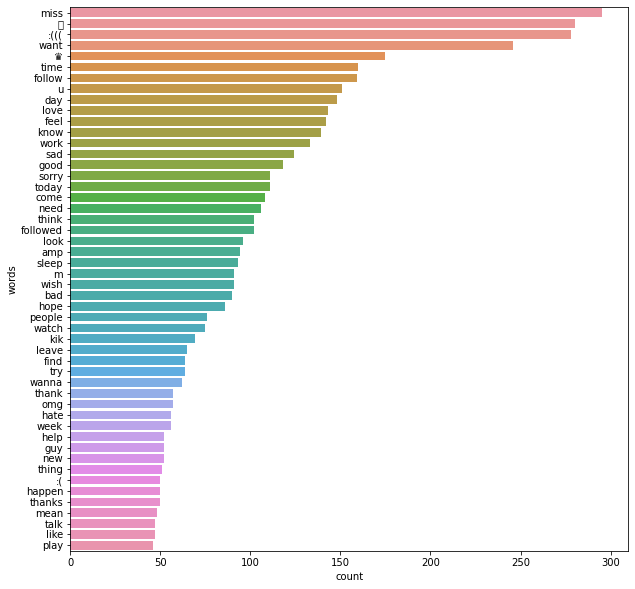

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='count',y='words', data=all_neg_word_df)

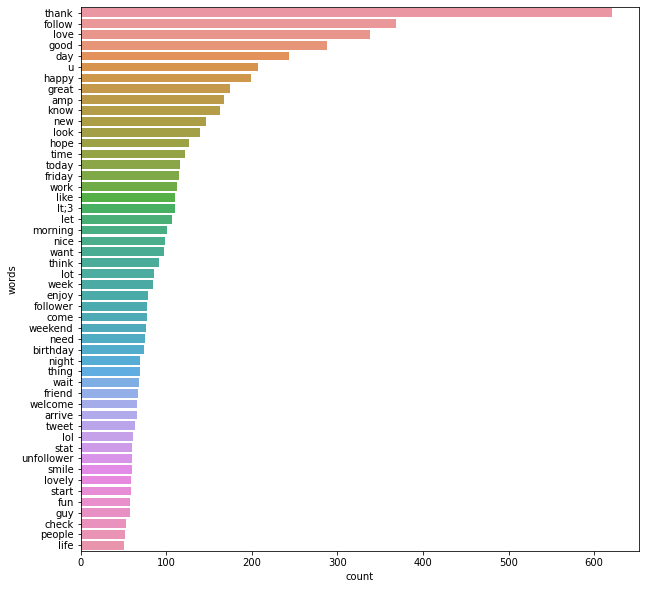

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='count',y='words', data=all_pos_word_df)

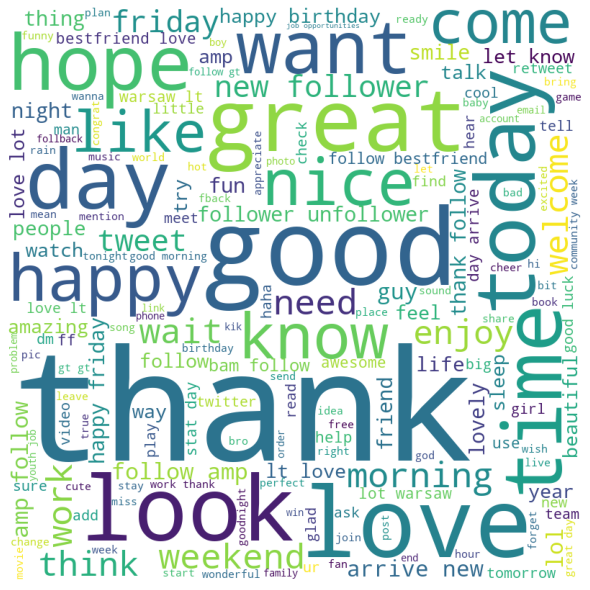

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(all_pos_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

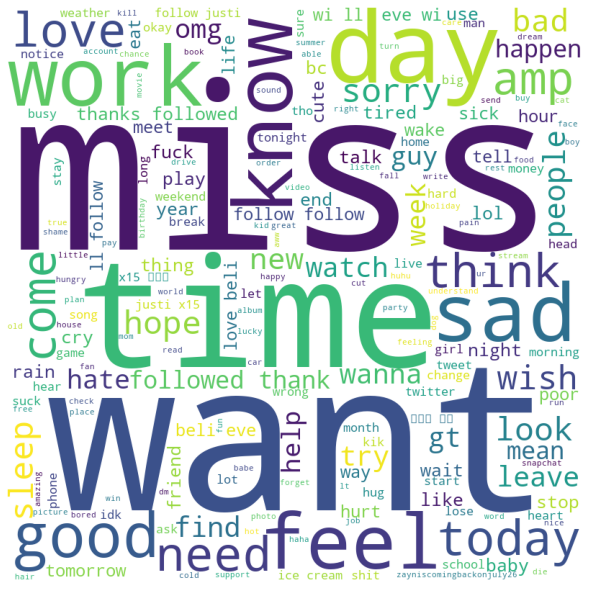

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(all_neg_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
positive_tweet_df = pd.DataFrame(positive_tweet_tokens)
negative_tweet_df = pd.DataFrame(negative_tweet_tokens)

In [ ]:
positive_tweet_df['target'] = positive_tweet_df.shape[0] * [1]

In [ ]:
negative_tweet_df['target'] = negative_tweet_df.shape[0] * [0]

In [ ]:
dataset = pd.concat([positive_tweet_df, negative_tweet_df])
dataset.head()

,0,target
0,followfriday engaged member community week,1
1,james,1
2,odd contact centre able assist,1
3,thank,1
4,listen night,1


In [ ]:
dataset.rename({0:'text'}, inplace=True, axis=1)
dataset.head()

,text,target
0,followfriday engaged member community week,1
1,james,1
2,odd contact centre able assist,1
3,thank,1
4,listen night,1


In [ ]:
X = dataset['text']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')

In [ ]:
X_train_features = tfidf.fit_transform(X_train)

In [ ]:
X_test_features = tfidf.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(X_test_features)

In [ ]:
confusion_matrix(y_test, pred)

array([[935, 373],
       [435, 979]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1308
           1       0.72      0.69      0.71      1414

    accuracy                           0.70      2722
   macro avg       0.70      0.70      0.70      2722
weighted avg       0.70      0.70      0.70      2722



In [ ]:
nb = MultinomialNB()
nb.fit(X_train_features, y_train)

MultinomialNB()

In [ ]:
nb_pred = nb.predict(X_test_features)

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.66      1308
           1       0.69      0.76      0.72      1414

    accuracy                           0.70      2722
   macro avg       0.70      0.69      0.69      2722
weighted avg       0.70      0.70      0.69      2722



In [ ]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=4)
dt.fit(X_train_features, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=4)

In [ ]:
dt_pred = dt.predict(X_test_features)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69      1308
           1       0.80      0.29      0.42      1414

    accuracy                           0.59      2722
   macro avg       0.67      0.61      0.55      2722
weighted avg       0.68      0.59      0.55      2722



In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11123 sha256=af8a149f237a73f50d0844fe2038f16ecea655b0af85e85e56e0c39040c1d7b6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from sklearn. metrics import recall_score
def objective(trial):
  
  penalty = trial.suggest_categorical('penalty', ['l2'])
  tol = trial.suggest_loguniform('tol', 1e-5, 1e-2)
  C = trial.suggest_float('C', 1.0, 2.0, step=0.2)
  solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'sag'])

  lr_tuned = LogisticRegression(penalty=penalty, tol=tol, solver=solver, C=C)
  lr_tuned.fit(X_train_features, y_train)
  lr_pred = lr_tuned.predict(X_test_features)
  recall = recall_score(y_test, dt_pred)
  return recall

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2022-06-04 05:19:59,404] A new study created in memory with name: no-name-d05d0dfd-00a0-4f33-8752-3d9ad984b9cb
[I 2022-06-04 05:19:59,686] Trial 0 finished with value: 0.2871287128712871 and parameters: {'penalty': 'l2', 'tol': 0.006348224787717601, 'C': 2.0, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.2871287128712871.
[I 2022-06-04 05:19:59,720] Trial 1 finished with value: 0.2871287128712871 and parameters: {'penalty': 'l2', 'tol': 0.0022367344432345083, 'C': 1.8, 'solver': 'liblinear'}. Best is trial 0 with value: 0.2871287128712871.
[I 2022-06-04 05:19:59,850] Trial 2 finished with value: 0.2871287128712871 and parameters: {'penalty': 'l2', 'tol': 0.0034313909534802187, 'C': 1.0, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.2871287128712871.
[I 2022-06-04 05:20:00,128] Trial 3 finished with value: 0.2871287128712871 and parameters: {'penalty': 'l2', 'tol': 0.0007872393983485109, 'C': 2.0, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.2871287128712871.
[I 2022-06-

In [ ]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
study.best_params

{'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.006348224787717601}

In [ ]:
tuned_model = LogisticRegression(**study.best_params)
tuned_model.fit(X_train_features, y_train)
tuned_pred = tuned_model.predict(X_test_features)
print(classification_report(y_test, tuned_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1308
           1       0.72      0.69      0.71      1414

    accuracy                           0.70      2722
   macro avg       0.70      0.70      0.70      2722
weighted avg       0.70      0.70      0.70      2722



In [ ]:
def result(result):
  if result == 1:
    print('positive')
  else:
    print('negative')

In [ ]:
def predict_result(lst):
  for tweets in lst:
    tweet = nlp(tweets)
    tweet = [' '.join(remove_noise(tweet, stopwords))]
    X_feature = tfidf.transform(tweet)
    result(lr.predict(X_feature)[0])

In [ ]:
new_tweet = 'SHOTS Fired! 5 DEAD and multiple people injured at Tulsa, Oklahoma Hospital 😥😥. My 🙏 and Condolences to All their families.'
tweet = nlp(new_tweet)
tweet = [' '.join(remove_noise(tweet, stopwords))]

In [ ]:
X_feature = tfidf.transform(tweet)

In [ ]:
result(lr.predict(X_feature)[0])

negative


In [ ]:
poritive_test_data = ['Hope you have a wonderful rest of your day!💕💚🖤🤍',
                      'Happy Saturday from Obanai & Mitsuri! 💜💚',
                      'Its all about striving for the best & moving forward 👊 ',
                      '''Hardik Pandya said, I ll make sure whatever I did for Gujarat Titans, I ll be able to do for India. The old Hardik will be back''',
                      'like for a cool animation! ',
                      '''Love this little guy!

#HollowKnight #game #pixelart #drawing #art #aseprite #fanart''',
'''Playing games, taking names. LETS GOOOOOOOOO
#twitch #stream #live #livetwitch #smallstreamersconnect #playing #gaming #game''']

In [ ]:
negative_test_data = ['ASKING WHY HOYOVERSE CAN DO THIS SO GOOD, NOW I CRIED IN MY BED 😭😭😭😭 ',
                      '''I've been struggling badly with my mental health recently.
                    If you see this, please just stop and say hello.I'm feeling really alone.''',
'''I'm fine.
(I'm depressed, I'm suicidal, I'm unloved, I'm lonely, I'm broken, I'm dying, I'm hurt, I'm scared)''',
'''SHOTS Fired! 5 DEAD and multiple people injured at Tulsa, Oklahoma Hospital 😥😥. My 🙏 and Condolences to All their families.''',
'''I'm funny... :l

I HATE MY LIFE , I HATE MY LIFE 
I HATE MY LIFE , I HATE MY LIFE 
I HATE MY LIFE , I HATE MY LIFE 
I HATE MY LIFE , I HATE MY LIFE 
(It’s just a joke)''',
'Jammu and Kashmir: Two non-local workers injured after terrorists hurl grenades at them in Shopian']

In [ ]:
predict_result(negative_test_data)

positive
negative
negative
negative
negative
negative


In [ ]:
predict_result(poritive_test_data)

positive
positive
positive
negative
positive
positive
positive
